<a href="https://colab.research.google.com/github/harsh191/intermediate-python-course/blob/master/OLYMPIC_MEDAL_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Olympic Medal Analysis**

**Project Type --> Sports**


**Project Prepared by --> Harsh Mishra**

### **Project Summery**

The Olympics Medal Analysis project focuses on analyzing global medal trends across countries and different sports using comprehensive Olympic medal datasets. The core objective is to track the dominance and shifts in medal performance among nations over time, providing actionable insights into competitive patterns at the Olympics.

Key Features

Comprehensive Data Analysis:

Utilizes Olympic medal data suggested from resources such as Reddit for in-depth nation-wise and sport-wise trend analysis.

Visual Exploration:

 Employs tools like line charts, bar plots, and nation clustering to visualize how nations have performed historically and where significant shifts have occurred.

**GitHub Link -** https://github.com/harsh191/intermediate-python-course/blob/master/OLYMPIC_MEDAL_ANALYSIS.ipynb

**Problem Statement**

Assess medaling trends across nations and sports using Olympic medal datasets to track dominance and shifts in performance over time, enabling the discovery of significant patterns and insights in global Olympic competition

In [31]:
#IMPORT LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import missingno as msno

In [32]:
# MOUNTING GOOGLE DRIVE TO ACCESS DATASET
from google.colab import drive
drive.mount('/content/drive')
path="/content/drive/MyDrive/dataset/Olympic medals.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
# TRYING TO READ DATASET
try:
  df = pd.read_csv(path, encoding='latin-1')
except UnicodeDecodeError:
  df = pd.read_csv(path, encoding='cp1252')

In [34]:
# CHECK COLUMNS NAMES AND TOTAL NUMBER OF COLUMNS
print(df.columns.tolist())
df_clean=df.copy()
print(df_clean.columns.tolist())
len(df_clean.columns)

['City', 'Year', 'Sport', 'Discipline', 'Event', 'Athlete', 'Gender', 'Country_Code', 'Country', 'Event_gender', 'Medal']
['City', 'Year', 'Sport', 'Discipline', 'Event', 'Athlete', 'Gender', 'Country_Code', 'Country', 'Event_gender', 'Medal']


11

In [35]:
# LOOKING TOP FIVE ROWS OF DATASET
df_clean.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


In [36]:
# FINDING NUMBER OF ROWS AND COLUMNS IN DATASET
df_clean.shape

(15433, 11)

In [37]:
# CHECKING DATATYPES OF COLUMNS,NUMBER OF NOT NULL VALUES
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15433 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15316 non-null  object 
 1   Year          15316 non-null  float64
 2   Sport         15316 non-null  object 
 3   Discipline    15316 non-null  object 
 4   Event         15316 non-null  object 
 5   Athlete       15316 non-null  object 
 6   Gender        15316 non-null  object 
 7   Country_Code  15316 non-null  object 
 8   Country       15316 non-null  object 
 9   Event_gender  15316 non-null  object 
 10  Medal         15316 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.3+ MB


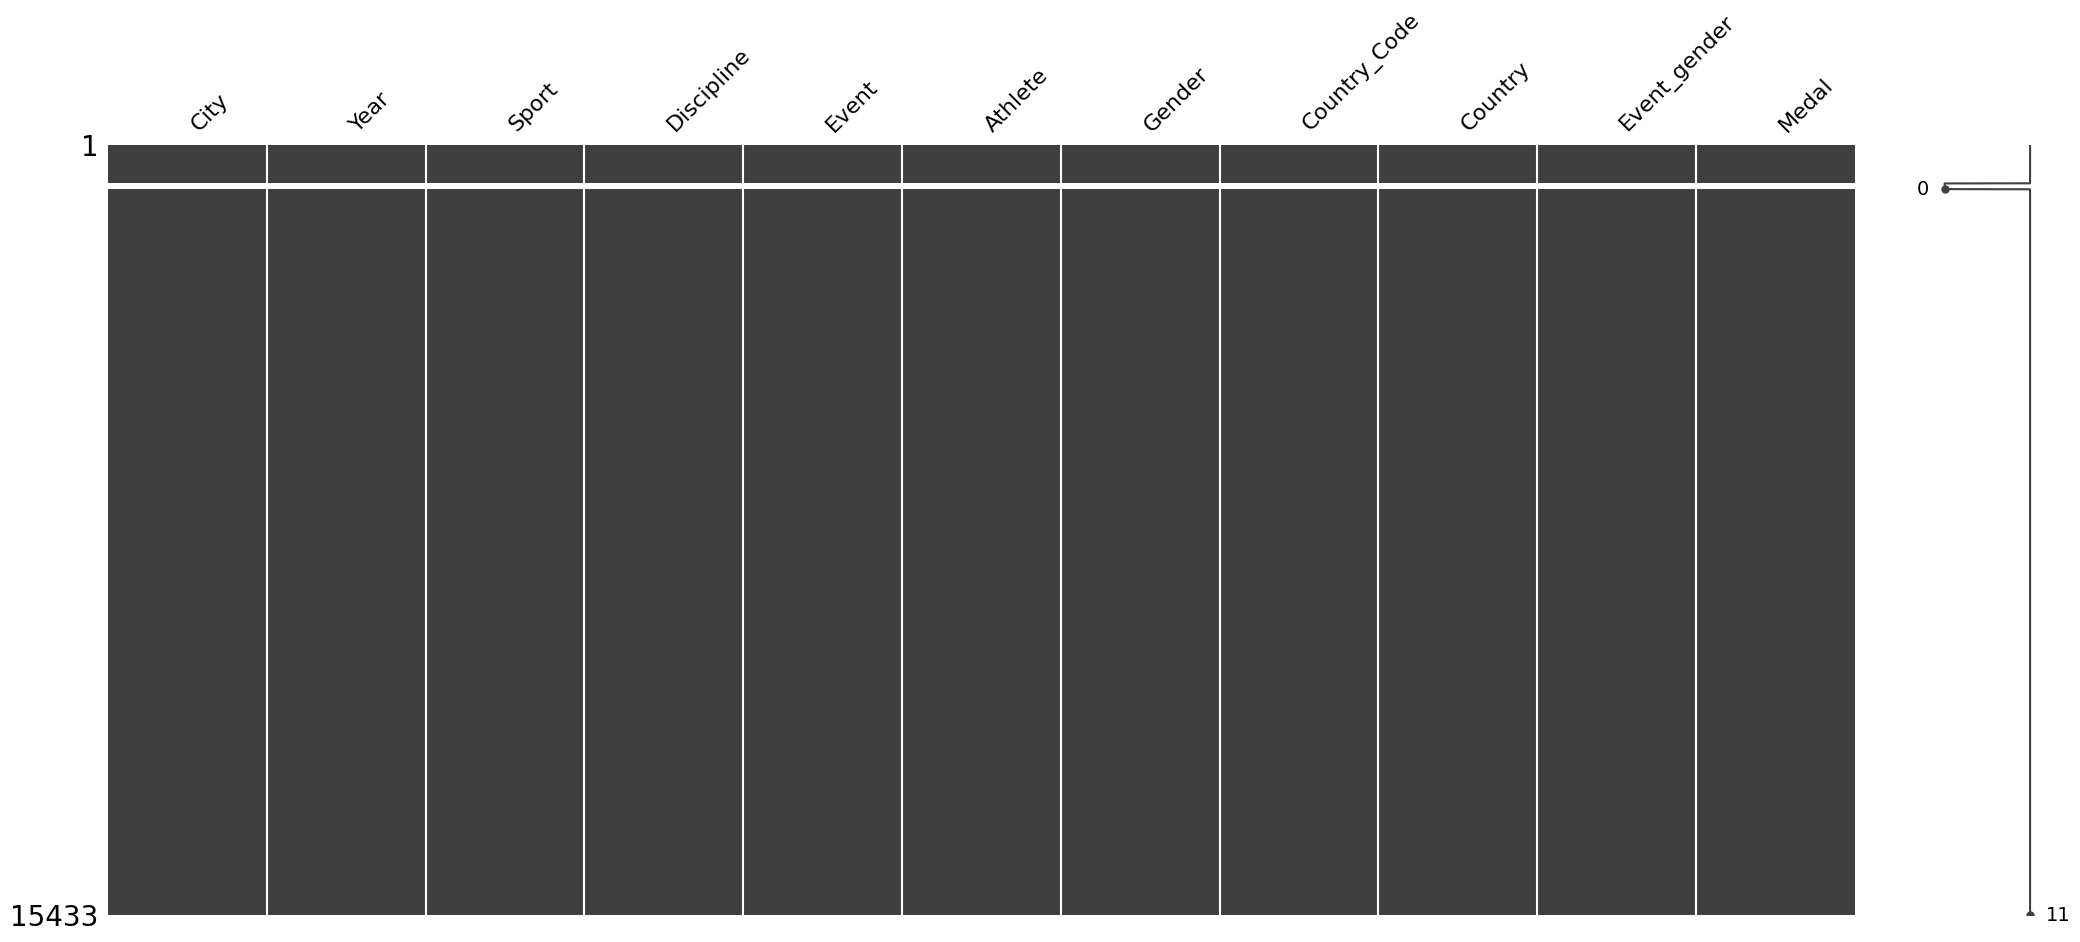

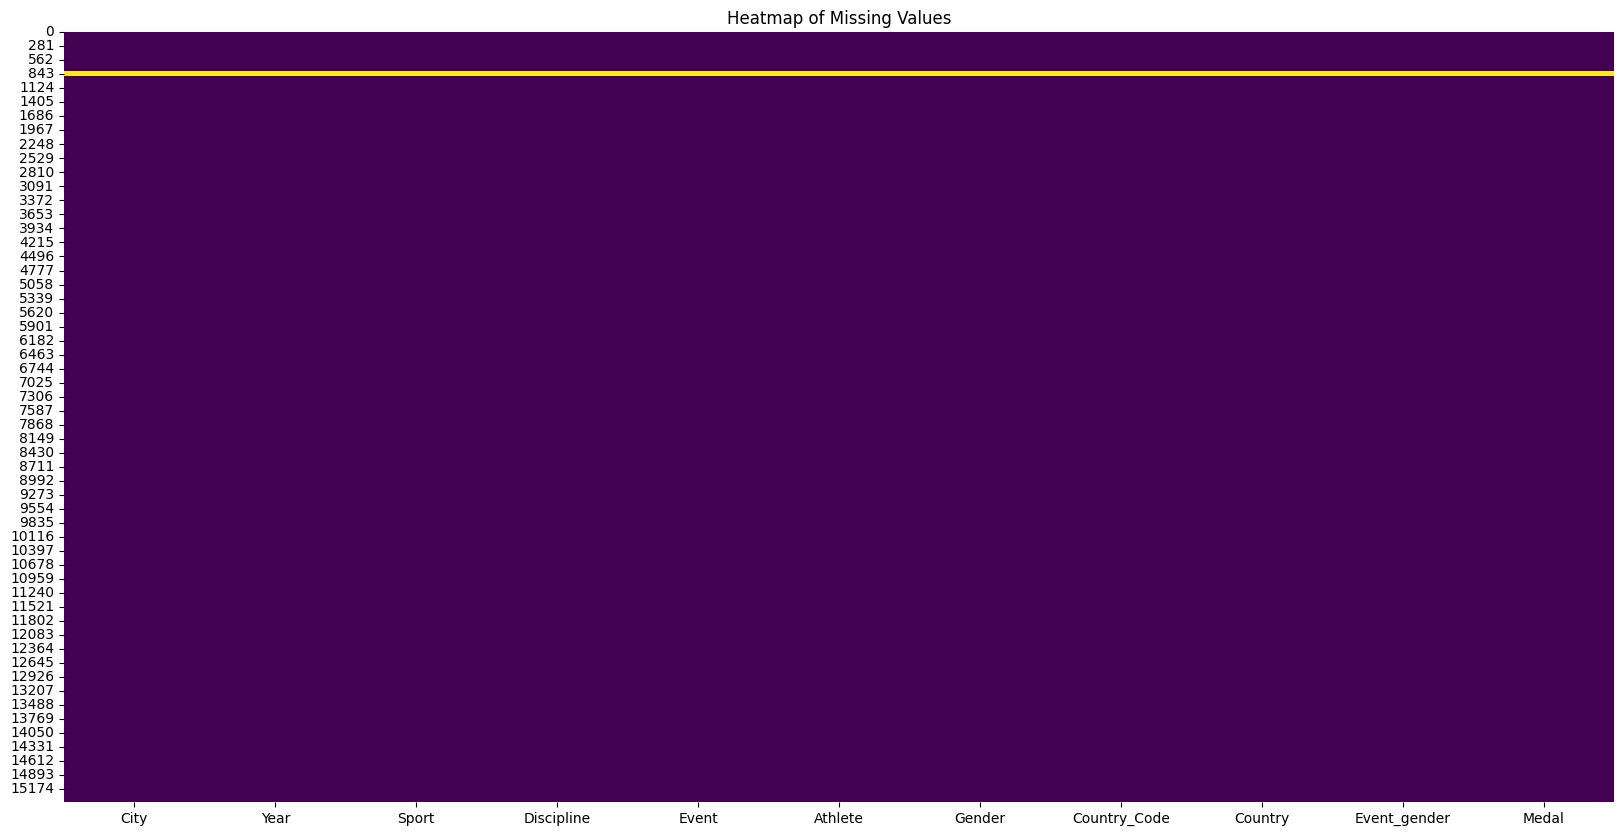

In [38]:
# VISUALIZE MISSING VALUE USING MISSINGNO MATRIX
msno.matrix(df)
plt.show()

# CREATING HEATMAP
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()



In [39]:
# CHECKING FOR DUPLICATE VALUES AND REMOVING THEM
print("Number of duplicate values = " + str(df.duplicated().sum()))
df_clean=df.drop_duplicates()
print("Shape of dataset after removing duplicates = "+ str(df_clean.shape))

Number of duplicate values = 117
Shape of dataset after removing duplicates = (15316, 11)


In [40]:
# CHECKING FOR NULL VALUES
df_clean.isnull().sum()

,0
City,1
Year,1
Sport,1
Discipline,1
Event,1
Athlete,1
Gender,1
Country_Code,1
Country,1
Event_gender,1


In [41]:
# REMOVING NULL VALUES CHECKING NEW SHAPE OF DATASET
df_clean.dropna(inplace=True)
print(df_clean.isnull().sum())
print("New shape of dataset =" + str(df_clean.shape))

City            0
Year            0
Sport           0
Discipline      0
Event           0
Athlete         0
Gender          0
Country_Code    0
Country         0
Event_gender    0
Medal           0
dtype: int64
New shape of dataset =(15315, 11)


In [42]:
# DESCRIBING DATASET
df_clean.describe()


,Year
count,15315.000000
mean,1993.621678
std,10.159586
min,1976.000000
25%,1984.000000
50%,1996.000000
75%,2004.000000
max,2008.000000


In [43]:
# CHECKING FOR NUMBER OF UNIQUE VALUES IN EACH COLUMNS
df_clean.nunique()

,0
City,9
Year,9
Sport,28
Discipline,41
Event,293
Athlete,11337
Gender,2
Country_Code,128
Country,127
Event_gender,3


In [44]:
# FIXING THE INCONSISTENT ENTRIES
df_clean['Country_Code']=df_clean['Country_Code'].replace("SCG","SRB")

In [45]:
# RECHECKING UNIQUE VALUE IN ORDER TO FIND OUT IF ABOVE CODE IS WORKED OR NOT
df_clean.nunique()

,0
City,9
Year,9
Sport,28
Discipline,41
Event,293
Athlete,11337
Gender,2
Country_Code,127
Country,127
Event_gender,3


EXPLORATORY DATA ANALYSIS


In [57]:
fig=px.scatter(df_clean,x="Country",color="Medal",hover_name="Discipline")
fig.update_layout(width=1400,height=700)
fig.update_layout(title_text="Scatter plot ")
fig.show()

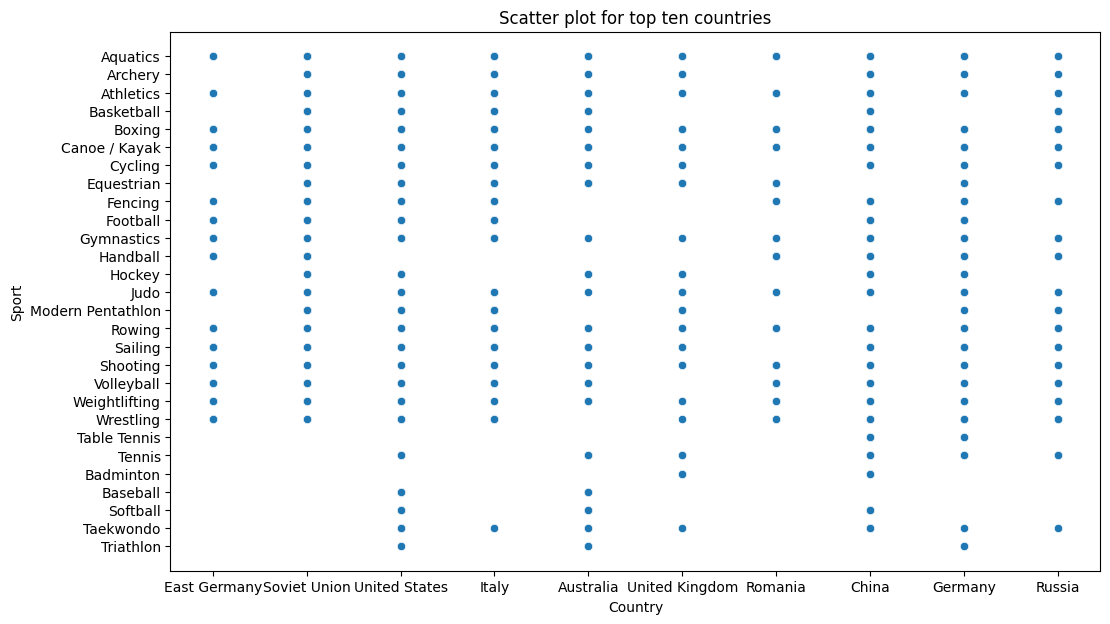

In [47]:
# MAKING SCATTER PLOT FOR MEDALS WON BY TOP TEN COUNTRY IN TERMS OF MEDAL COUNT
top_ten=df_clean['Country'].value_counts().nlargest(10).index
plt.figure(figsize=(12,7))
sns.scatterplot(x='Country',y='Sport',data=df_clean[df_clean['Country'].isin(top_ten)])
plt.title('Scatter plot for top ten countries')
plt.show()

In [48]:
# CREATING A BAR PLOT FOR TOP TEN COUNTRIES WITH TOTAL MEDAL COUNT
# Get the top 10 countries by medal count
top_ten_countries = df_clean['Country'].value_counts().nlargest(10).index.tolist()

# Filter data for the top ten countries
df_top_ten = df_clean[df_clean['Country'].isin(top_ten_countries)]

# Create the bar plot for the top ten countries
fig = px.bar(df_top_ten, x="Country", color="Medal", hover_name="Discipline",
             title="Medal Distribution for Top Ten Countries with Total Count",
             labels={"Country": "Country", "count": "Number of Medals"})

# Add text labels for the total medal count on top of the bars
# Calculate total medal count per country for the top ten
total_medals = df_top_ten['Country'].value_counts().reset_index()
total_medals.columns = ['Country', 'total_medals']

# Add the total medal count as text annotations. This requires iterating through countries
for country in total_medals['Country']:
    count = total_medals[total_medals['Country'] == country]['total_medals'].iloc[0]
    fig.add_annotation(
        x=country,
        y=count,
        text=str(count),
        showarrow=False,
        yshift=10 # Adjust vertical position of the text
    )
fig.update_layout(width=1200,height=700,plot_bgcolor='white')
fig.update_traces(opacity=1.0)

fig.show()

In [49]:
# Get the top 10 countries by total medal count
top_ten_countries = df_clean['Country'].value_counts().nlargest(10).index.tolist()

# Filter the DataFrame to include only the top 10 countries
df_top_ten = df_clean[df_clean['Country'].isin(top_ten_countries)]

# Group the data by Country and Medal and count the occurrences
medal_counts_by_country_medal = df_top_ten.groupby(['Country', 'Medal']).size().reset_index(name='count')

# Create a grouped bar chart
fig = px.bar(medal_counts_by_country_medal, x="Country", y="count", color="Medal",
             barmode='group', # This sets the bars to be grouped side-by-side
             text='count', # Add text labels with the count
             title="Medal Count by Country and Medal Type (Top 10 Countries) with Counts",
             labels={"Country": "Country", "count": "Number of Medals", "Medal": "Medal Type"})

fig.update_layout(width=1200, height=700, plot_bgcolor='white', uniformtext_minsize=8, uniformtext_mode='hide') # Adjust layout and text properties
fig.show()

In [50]:
# Get the top 10 countries by total medal count
top_ten_countries = df_clean['Country'].value_counts().nlargest(10).index.tolist()

# Get the top 15 sports by total medal count
top_sports = df_clean['Sport'].value_counts().nlargest(15).index.tolist()

# Filter data for the top ten countries and top 15 sports
df_top_countries_sports = df_clean[
    df_clean['Country'].isin(top_ten_countries) &
    df_clean['Sport'].isin(top_sports)
]

# Group by Sport and Country and count the occurrences
medal_counts_by_sport_country = df_top_countries_sports.groupby(['Sport', 'Country']).size().reset_index(name='count')

# Create a stacked bar chart
fig = px.bar(medal_counts_by_sport_country, x="Sport", y="count", color="Country",
             title="Medal Count by Top Sports (Top 10 Countries)",
             labels={"Sport": "Sport", "count": "Number of Medals", "Country": "Country"})

fig.update_layout(width=1000, height=700, plot_bgcolor='white')
fig.update_xaxes(categoryarray=top_sports) # Order the x-axis by the top sports
fig.show()

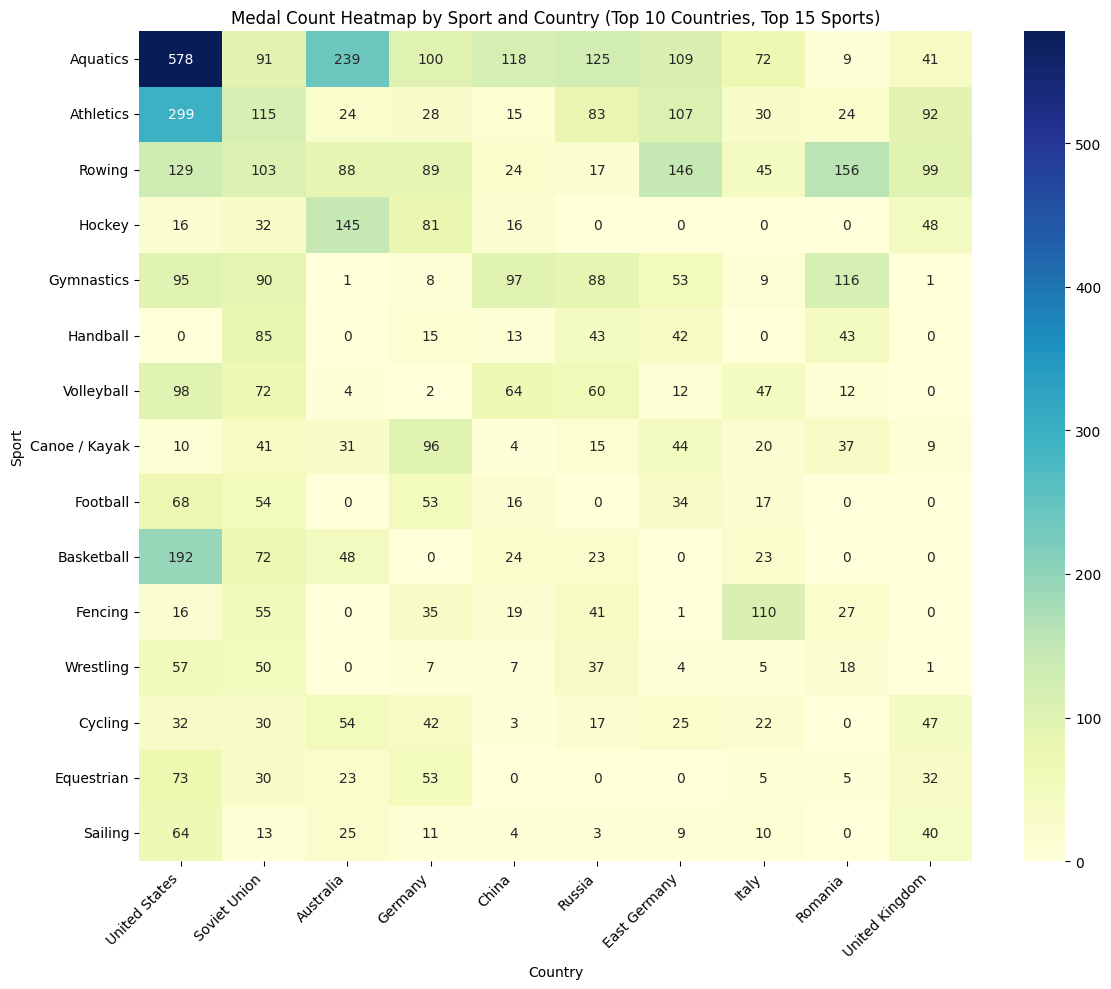

In [56]:
# Get the top 10 countries by total medal count
top_ten_countries = df_clean['Country'].value_counts().nlargest(10).index.tolist()

# Get the top 15 sports by total medal count
top_sports = df_clean['Sport'].value_counts().nlargest(15).index.tolist()

# Filter data for the top ten countries and top 15 sports
df_top_countries_sports = df_clean[
    df_clean['Country'].isin(top_ten_countries) &
    df_clean['Sport'].isin(top_sports)
]

# Group by Sport and Country and count the occurrences
medal_counts_pivot = df_top_countries_sports.groupby(['Sport', 'Country']).size().unstack(fill_value=0)

# Reindex to ensure all top sports and countries are included, even if they have 0 medals in some combinations
medal_counts_pivot = medal_counts_pivot.reindex(index=top_sports, columns=top_ten_countries, fill_value=0)


# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(medal_counts_pivot, annot=True, fmt="d", cmap="YlGnBu") # Using a blue-green colormap
plt.title("Medal Count Heatmap by Sport and Country (Top 10 Countries, Top 15 Sports)")
plt.xlabel("Country")
plt.ylabel("Sport")
plt.yticks(rotation=0) # Ensure y-axis labels are horizontal
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

In [54]:
# Show dominant country each year in each sport
medal_counts_over_time = df_clean.groupby(['Year', 'Sport', 'Country']).size().reset_index(name='medal_count')

# Group by Year and Sport, then find the index of the maximum medal count within each group
idx_max_medals = medal_counts_over_time.groupby(['Year', 'Sport'])['medal_count'].idxmax()

# Use these indices to select the rows from the original DataFrame
dominant_country_per_sport_year = medal_counts_over_time.loc[idx_max_medals]

print("Dominant Country in Each Sport per Year:")
display(dominant_country_per_sport_year)

Dominant Country in Each Sport per Year:


,Year,Sport,Country,medal_count
9,1976.0,Aquatics,United States,51
13,1976.0,Archery,Soviet Union,2
21,1976.0,Athletics,East Germany,36
39,1976.0,Basketball,Soviet Union,24
44,1976.0,Boxing,Cuba,8
...,...,...,...,...
2509,2008.0,Tennis,United States,4
2510,2008.0,Triathlon,Australia,2
2515,2008.0,Volleyball,Brazil,28
2521,2008.0,Weightlifting,China,9


In [55]:
# Show shift in domination year wise in a few key sports
medal_counts_over_time = df_clean.groupby(['Year', 'Sport', 'Country']).size().reset_index(name='medal_count')

# Get the top 5 sports by total medal count for visualization
top_sports_for_trend = df_clean['Sport'].value_counts().nlargest(5).index.tolist()

# Get the top 10 countries by total medal count (to filter the data)
top_ten_countries = df_clean['Country'].value_counts().nlargest(10).index.tolist()


# Filter medal_counts_over_time for the top sports and top countries
df_trend = medal_counts_over_time[
    medal_counts_over_time['Sport'].isin(top_sports_for_trend) &
    medal_counts_over_time['Country'].isin(top_ten_countries)
]

# Create line plots for each of the top sports
for sport in top_sports_for_trend:
    fig = px.line(df_trend[df_trend['Sport'] == sport],
                  x='Year',
                  y='medal_count',
                  color='Country',
                  title=f'Medal Count Over Time in {sport} (Top Countries)',
                  labels={'Year': 'Year', 'medal_count': 'Number of Medals', 'Country': 'Country'})
    fig.update_layout(width=1000, height=600, plot_bgcolor='white')
    fig.show()